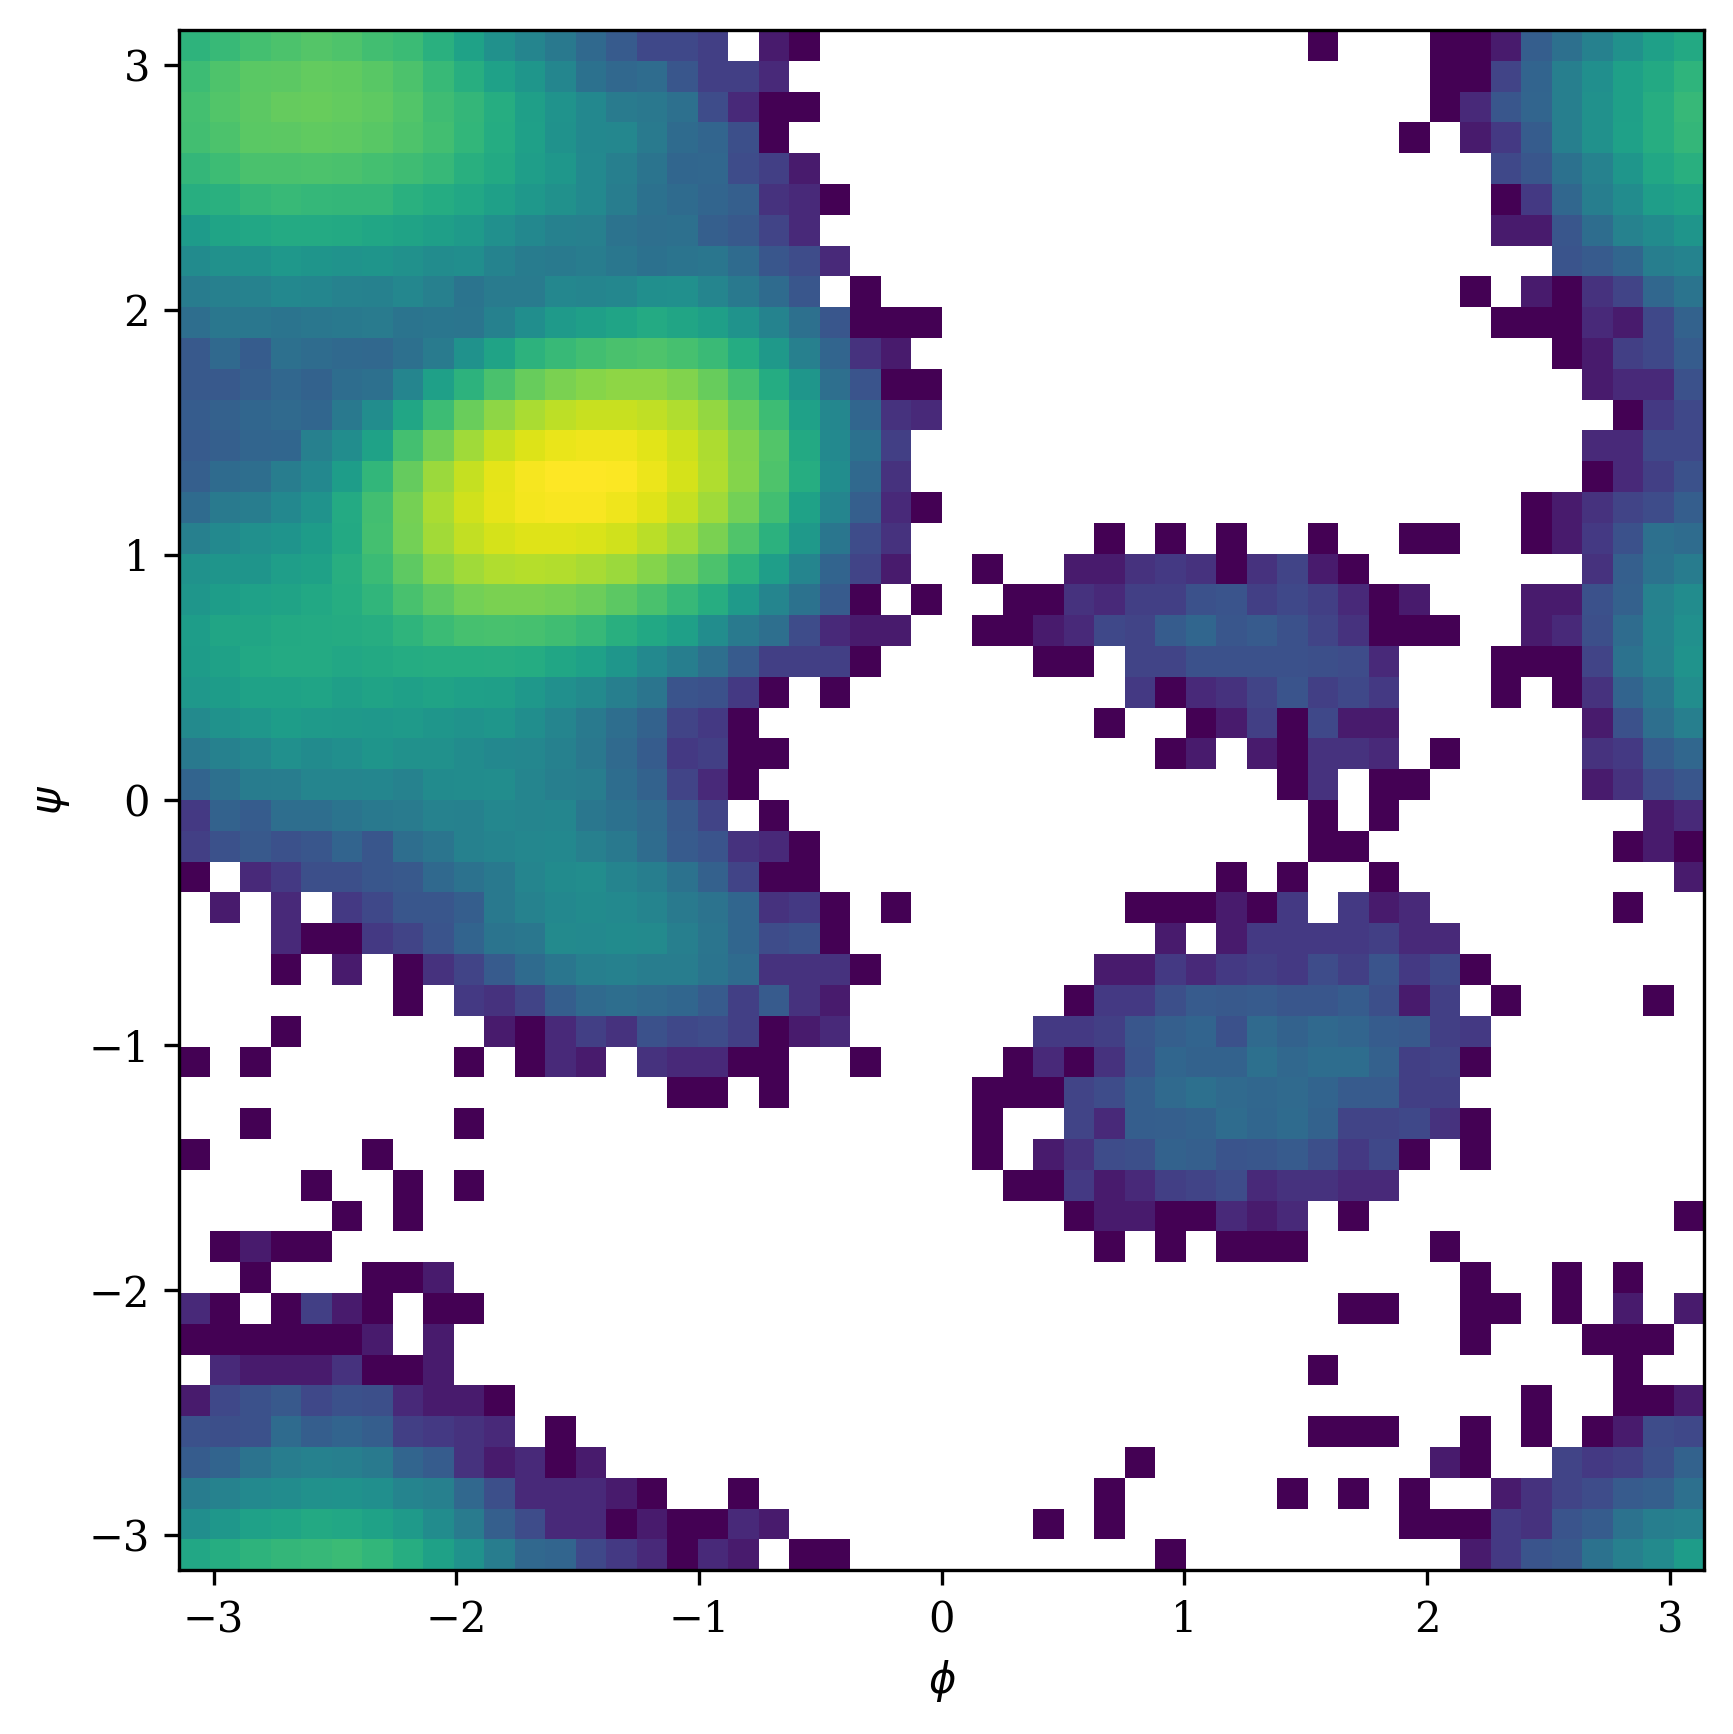

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'lines.linewidth': 1.5,
})

def compute_dihedral(xs):
    v = xs[:, :-1] - xs[:, 1:]
    v0 = -v[:, 0]
    v1 = v[:, 2]
    v2 = v[:, 1]

    s0 = np.sum(v0 * v2, axis=-1, keepdims=True) / np.sum(v2 * v2, axis=-1, keepdims=True)
    s1 = np.sum(v1 * v2, axis=-1, keepdims=True) / np.sum(v2 * v2, axis=-1, keepdims=True)

    v0 = v0 - s0 * v2
    v1 = v1 - s1 * v2

    v0 = v0 / np.linalg.norm(v0, axis=-1, keepdims=True)
    v1 = v1 / np.linalg.norm(v1, axis=-1, keepdims=True)
    v2 = v2 / np.linalg.norm(v2, axis=-1, keepdims=True)

    x = np.sum(v0 * v1, axis=-1)
    v3 = np.cross(v0, v2, axis=-1)
    y = np.sum(v3 * v1, axis=-1)
    return np.arctan2(y, x)


def plot_phi_psi(xs):
    fig = plt.figure(figsize=(6, 6))
    
    angle_1 = [6, 8, 14, 16]
    angle_2 = [1, 6, 8, 14] 
    
    psi = compute_dihedral(xs[:, angle_1, :])
    phi = compute_dihedral(xs[:, angle_2, :])

    xedges = np.linspace(-np.pi, np.pi, 51)
    yedges = np.linspace(-np.pi, np.pi, 51)
    plt.hist2d(phi, psi, bins=[xedges, yedges], norm=LogNorm(), cmap="viridis", density=True)
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-np.pi, np.pi)
    plt.xlabel("$\phi$")
    plt.ylabel("$\psi$")
    plt.xticks()
    plt.yticks()
    plt.tight_layout()

# xs = np.load(f'../result/2025-05-05_22:40:16/sample/Teacher_0.npy').reshape(-1, 22, 3)
xs = np.load(f'../data/aldp/aldp.npy').reshape(-1, 22, 3)
plot_phi_psi(xs)